# Training Efficiency Analysis

This notebook analyzes training efficiency by plotting success rate vs total steps:
- Downloads training history from training runs (Episode/success_rate)
- Plots mean success rate with 95% CI shaded region
- Optionally shows threshold line and labels steps to reach it

In [ ]:
# ============================================================
# BLOCK 1: IMPORTS & LOCAL CONFIGURATION
# ============================================================

import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import shared utilities
from analysis_utils import (
    # Constants
    ENTITY, PROJECT, COLORS,
    # Data functions
    download_training_history,
    # Plotting functions
    plot_training_curves,
)

# ============================================================
# LOCAL CONFIGURATION (specific to this analysis)
# ============================================================

# Method Tags
METHOD_TAGS = {
    #"Pose": "pose_perf-comp:2026-01-05_10:54",
    #"Hybrid-Basic": "basic-hybrid_perf-comp:2026-01-05_10:54",
    #"SWISH": "LCLoP_fix_perf-comp:2026-01-09_11:17",
    #"Pose": "pose_base-case:2026-02-02_13:40",
    #"MATCH": "MATCH_base-case:2026-02-04_17:46",
    #"Hybrid-Basic": "basic-hybrid_base-case:2026-02-02_13:40",


    #"Pose": "pose_breakable_f10N:2026-02-04_17:49",
    #"Pose(2.5mm)": "pose_25mm_f10:2026-02-05_22:12",
    #"MATCH": "MATCH_breakable_10N:2026-02-04_17:49",
    #"Hybrid": "basic-hybrid_breakable_f10N:2026-02-04_17:49",

    #"VIC":  "pose_vic_squashed_breakable_f10:2026-02-21_10:59",
    #"Pose": "pose_squashed_breakable_f10:2026-02-21_10:59",
    #"Hybrid-MATCH": "MATCH_squashed_breakable_f10:2026-02-21_10:59",
    #"Hybrid-Basic": "hybrid_squashed_breakable_f10:2026-02-21_10:59",

    # DR
    # 10N
        "Pose": "pose_DR_breakable_f10:2026-02-25_14:14",
        # "Pose(2.5mm)":"",
        "Hybrid-Basic":"hybrid_DR_breakable_f10:2026-02-25_14:14",
        "Hybrid-MATCH":"MATCH_DR_breakable_f10:2026-02-25_14:14",
    #15N
        #"Pose": "pose_DR_breakable_f15:2026-02-25_14:15",
        #"Pose(2.5mm)": "",
        #"Hybrid-Basic": "hybrid_DR_breakable_f15:2026-02-25_14:30",
        #"Hybrid-MATCH": "MATCH_DR_breakable_f15:2026-02-25_14:14",
    #20N
        #"Pose": "pose_DR_breakable_f20:2026-02-25_17:29",
        #"Hybrid-Basic": "hybrid_DR_breakable_f20:2026-02-25_17:29",
        #"Hybrid-MATCH": "MATCH_DR_breakable_f20:2026-02-25_17:29",
    #"10000N": {
    #    "Pose": "pose_squashed_base-case_f10000:2026-02-26_01:41",
    #    "Hybrid-Basic": "hybrid_squashed_base-case_f10000:2026-02-26_01:43",
    #    "Hybrid-MATCH": "MATCH_squashed_base-case_f10000:2026-02-26_01:42",
    #}
}

# Metric to extract from training runs
METRIC_COL = "Episode/success_rate"
SCALE_FACTOR = 100.0  # Convert from 0-1 to percentage

# Threshold Configuration
SUCCESS_THRESHOLD = 80  # Percentage threshold for labeling
SHOW_THRESHOLD_ANNOTATIONS = False  # Set to True to show threshold line and annotations

# Plot Configuration
X_LIM = (0, 2500000)
Y_LIM = (0, 100)
Y_TICKS = [0, 20, 40, 60, 80, 100]
CI_ALPHA = 0.2

In [14]:
# ============================================================
# BLOCK 2: DOWNLOAD TRAINING DATA
# ============================================================

api = wandb.Api()
training_data = {}

print("Downloading training history...")
print("=" * 60)

for method_name, method_tag in METHOD_TAGS.items():
    print(f"\n{method_name} ({method_tag}):")
    training_data[method_name] = download_training_history(
        api=api,
        method_tag=method_tag,
        metric_col=METRIC_COL,
        scale_factor=SCALE_FACTOR,
    )

# Print summary
print("\n" + "=" * 60)
print("DATA SUMMARY")
print("=" * 60)
for method_name, df in training_data.items():
    if not df.empty:
        n_runs = df["run_name"].nunique()
        n_steps = df["total_steps"].nunique()
        print(f"{method_name}: {n_runs} runs, {n_steps} unique steps")
    else:
        print(f"{method_name}: No data")


Pose (pose_DR_breakable_f15:2026-02-25_14:15):
  pose_DR_breakable_f(15)_0: 78 checkpoints
  pose_DR_breakable_f(15)_1: 78 checkpoints
  pose_DR_breakable_f(15)_2: 78 checkpoints
  pose_DR_breakable_f(15)_3: 78 checkpoints
  pose_DR_breakable_f(15)_4: 78 checkpoints
  Eval_forge_noise_best_pose_DR_breakable_f(15)_0: 1 checkpoints
  Eval_forge_noise_best_pose_DR_breakable_f(15)_1: 1 checkpoints
  Eval_forge_noise_best_pose_DR_breakable_f(15)_2: 1 checkpoints
  Eval_forge_noise_best_pose_DR_breakable_f(15)_3: 1 checkpoints
  Eval_forge_noise_best_pose_DR_breakable_f(15)_4: 1 checkpoints

Hybrid-Basic (hybrid_DR_breakable_f15:2026-02-25_14:30):
  hybrid_DR_breakable_f(15)_0: 78 checkpoints
  hybrid_DR_breakable_f(15)_1: 78 checkpoints
  hybrid_DR_breakable_f(15)_2: 78 checkpoints
  hybrid_DR_breakable_f(15)_3: 78 checkpoints
  hybrid_DR_breakable_f(15)_4: 78 checkpoints
  Eval_forge_noise_best_hybrid_DR_breakable_f(15)_0: 1 checkpoints
  Eval_forge_noise_best_hybrid_DR_breakable_f(15)_1:

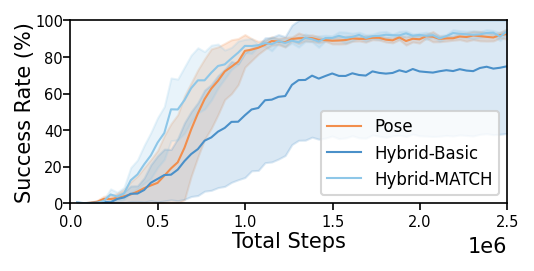

In [15]:

import importlib
import analysis_utils
importlib.reload(analysis_utils)

# Import shared utilities
# Import shared utilities
from analysis_utils import (
    # Constants
    ENTITY, PROJECT, COLORS,
    # Data functions
    download_training_history,
    # Plotting functions
    plot_training_curves,
)

# ============================================================
# BLOCK 3: TRAINING EFFICIENCY PLOT
# ============================================================
FIGSIZE = (3.5, 1.75) #(3.5, 1.17)
fig, ax, threshold_crossings = plot_training_curves(
    data_by_method=training_data,
    #title="Training Efficiency",
    x_label="Total Steps",
    y_label="Success Rate (%)",
    x_lim=X_LIM,
    y_lim=Y_LIM,
    y_ticks=Y_TICKS,
    threshold=SUCCESS_THRESHOLD if SHOW_THRESHOLD_ANNOTATIONS else None,
    show_threshold_annotations=SHOW_THRESHOLD_ANNOTATIONS,
    ci_alpha=CI_ALPHA,
    figsize=FIGSIZE,
)

# Print threshold crossings if computed
if threshold_crossings:
    print("\n" + "=" * 60)
    print(f"STEPS TO REACH {SUCCESS_THRESHOLD}% SUCCESS RATE")
    print("=" * 60)
    for method_name, step in sorted(threshold_crossings.items(), key=lambda x: x[1]):
        print(f"{method_name}: {step:,} steps")

plt.show()